In [126]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [127]:
all_df = pd.read_excel("data/car.xlsx")

In [128]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]

In [129]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [130]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [131]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [132]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1728 train: 1373 test: 355


In [133]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

In [134]:
train_Features[:4]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 1, 0]])

In [135]:
train_Label[:4]

array([0, 0, 0, 0])

In [136]:
train_Features.shape

(1373, 6)

In [137]:
train_Features = train_Features.reshape(train_Features.shape[0], 3, 2, 1)

In [138]:
train_Features.shape

(1373, 3, 2, 1)

In [139]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [140]:
model = Sequential()

In [141]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(3,2,1), 
                 activation='relu'))

In [142]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [143]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [144]:
model.add(Dropout(0.25))

In [145]:
model.add(Flatten())

In [146]:
model.add(Dense(128, activation='tanh'))

In [147]:
model.add(Dropout(0.25))

In [148]:
model.add(Dense(1,activation='sigmoid'))

In [149]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 3, 2, 1000)        2000      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 2, 1000)        1001000   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 2, 1000)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 2, 1000)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               768128    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
__________

In [150]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
1373/1373 [==============================] - 16s 12ms/step - loss: 0.3995 - acc: 0.7356


In [151]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=100,verbose=1)

Train on 1098 samples, validate on 275 samples
Epoch 1/10
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1456 - acc: 0.8761 - val_loss: 0.6166 - val_acc: 0.7382
Epoch 2/10
1098/1098 [==============================] - 11s 10ms/step - loss: 0.1391 - acc: 0.8816 - val_loss: 0.6145 - val_acc: 0.7382
Epoch 3/10
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1324 - acc: 0.8925 - val_loss: 0.6136 - val_acc: 0.7345
Epoch 4/10
1098/1098 [==============================] - 8s 8ms/step - loss: 0.1327 - acc: 0.8907 - val_loss: 0.6123 - val_acc: 0.7418
Epoch 5/10
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1363 - acc: 0.8916 - val_loss: 0.6082 - val_acc: 0.7382
Epoch 6/10
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1309 - acc: 0.8998 - val_loss: 0.6077 - val_acc: 0.7418
Epoch 7/10
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1303 - acc: 0.8998 - val_loss: 0.6081 - val_acc: 0.7418
Epoch 8/10
10

In [152]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

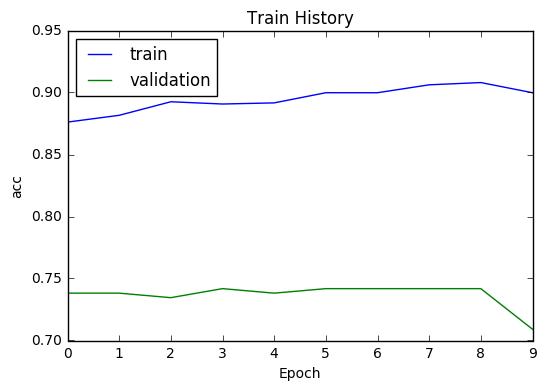

In [153]:
show_train_history(train_history,'acc','val_acc')

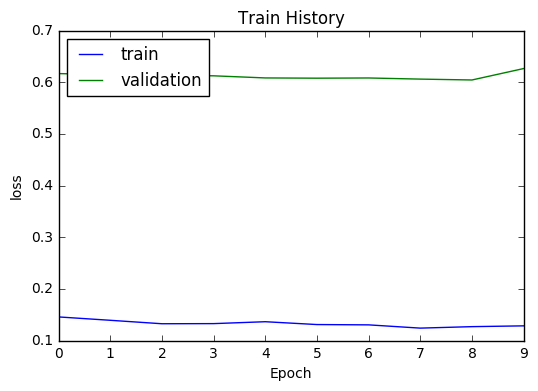

In [154]:
show_train_history(train_history,'loss','val_loss')

In [155]:
test_Features = test_Features.reshape(test_Features.shape[0], 3, 2, 1)

In [156]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

355/355 [==============================] - 0s 947us/step


In [157]:
scores[1]

0.8563380282529642